# Lorentz attaractor diff initial conditon

2.0259695212408646 4.9350233690042735 24.11351029714426


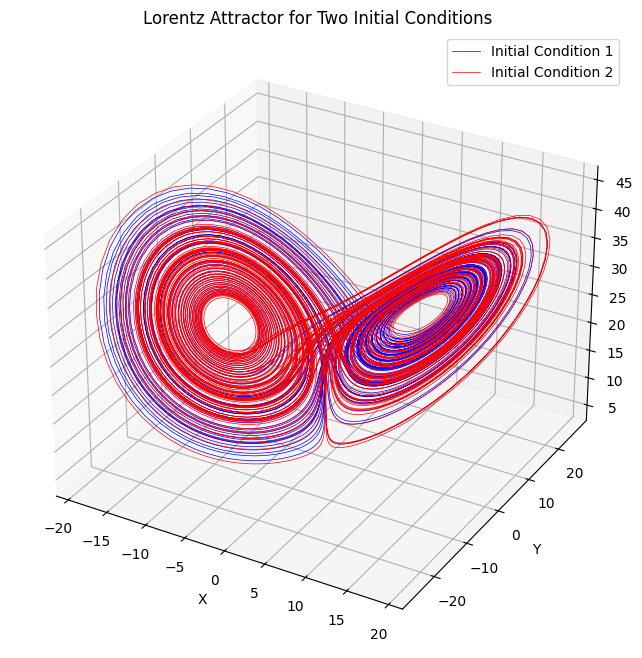

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lorentz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Define the Lorentz system
def lorentz(state, t):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Time points (0 to 50 with 10000 steps)
t = np.linspace(0, 100, 10000)

# initial_condition1 = [1.0, 1.0, 1.0]
# initial_condition2 = [1.01, 1.01, 1.01]  # Slightly perturbed
#   -10.594887514965762 -15.398070616041126 22.893945844825783
# Initial conditions
initial_condition1 = [-10.594887514965762, -15.398070616041126, 22.893945844825783]  # First initial condition
initial_condition2 = [-10.594887514965762+10**(-12), -15.398070616041126+10**(-12), 22.893945844825783+10**(-12)]   # Slightly perturbed initial condition

# Solve the ODEs for both initial conditions
solution1 = odeint(lorentz, initial_condition1, t)
solution2 = odeint(lorentz, initial_condition2, t)

# Extract trajectories
x1, y1, z1 = solution1.T
x2, y2, z2 = solution2.T
print(x1[-1],y1[-1],z1[-1])


# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the two attractors
ax.plot(x1, y1, z1, lw=0.5, color='blue', label='Initial Condition 1')
ax.plot(x2, y2, z2, lw=0.5, color='red', label='Initial Condition 2')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorentz Attractor for Two Initial Conditions')
ax.legend()
plt.show()



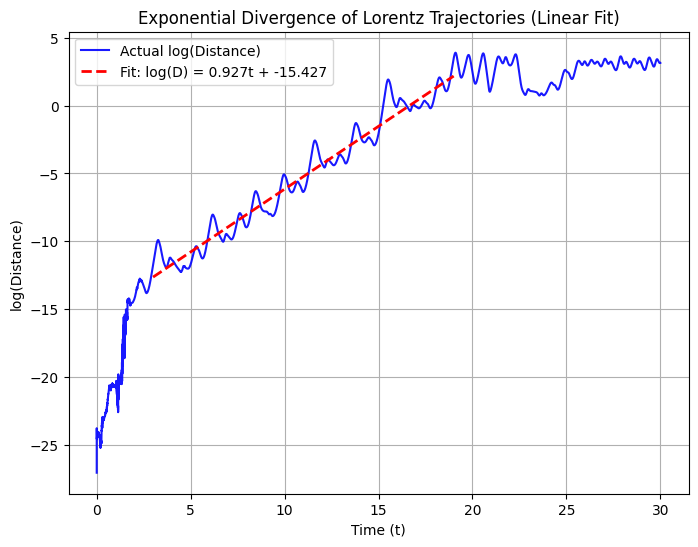

Fit parameters: a = 0.92705, b = -15.42731


Largest Lyapunov exponent: $\lambda$ = 0.92705

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Lorentz system parameters
sigma, beta, rho = 10.0, 8.0/3.0, 28.0

def lorentz(state, t):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Initial conditions
initial_condition1 = [-10.594887514965762, -15.398070616041126, 22.893945844825783]  # First initial condition
initial_condition2 = [-10.594887514965762+10**(-12), -15.398070616041126+10**(-12), 22.893945844825783+10**(-12)]   # Slightly perturbed initial condition

dt = 0.0005  # Time step size
t = np.arange(0, 30 + dt, dt)  
# Solve ODEs
sol1 = odeint(lorentz, initial_condition1, t)
sol2 = odeint(lorentz, initial_condition2, t)

# Compute Euclidean distance and take log
distance = np.sqrt(np.sum((sol2 - sol1)**2, axis=1))
log_distance = np.log(distance)

# Define time range for fitting (t=5 to t=30)
mask = (t >= 3) & (t <= 19)
t_fit = t[mask]
logD_fit = log_distance[mask]

# Linear fit function: log(D) = a*t + b
def linear_func(t, a, b):
    return a * t + b

# Perform the fit
params, _ = curve_fit(linear_func, t_fit, logD_fit)
a, b = params

# Generate fitted curve
fitted_logD = linear_func(t_fit, a, b)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(t, log_distance, label='Actual log(Distance)', color='b', alpha=0.9)
plt.plot(t_fit, fitted_logD, label=f'Fit: log(D) = {a:.3f}t + {b:.3f}', 
         color='r', linestyle='--', linewidth=2)
plt.xlabel('Time (t)')
plt.ylabel('log(Distance)')
plt.title('Exponential Divergence of Lorentz Trajectories (Linear Fit)')
plt.grid(True)
plt.legend()
plt.show()

# Print parameters
print(f"Fit parameters: a = {a:.5f}, b = {b:.5f}")
from IPython.display import display, Markdown
display(Markdown(f"Largest Lyapunov exponent: $\lambda$ = {a:.5f}"))